In [1]:
import pandas as pd
import numpy

In [2]:
df = pd.read_json('instagram_muayfitkksentiment.json', orient='record')
df2 = pd.read_json('instagram_chifitnesssentiment.json', orient='record')
df3 = pd.read_json('instagram_fitnessfirstsentiment.json', orient='record')

final_df = pd.concat([df,df2,df3], ignore_index=True)
final_df

,Comment,Post,Sentiment,Source,Topic
0,I love this!,"Don't just dream of 6packs, come and earn it!\...",1.000,Instagram Comment MuayFit,
1,Heck yes!..,Back to Basics for Boxing by Biagtan!\nCome bo...,1.000,Instagram Comment MuayFit,"yes,basics,bo"
2,Loads of good photos :)I like your profile. Yo...,Never mess with a BJJ practitioner!\nGood in y...,1.000,Instagram Comment MuayFit,"job,striking,arts,bloopers,ground,video,practi..."
3,Omg i miss u: D,Never mess with a BJJ practitioner!\nGood in y...,-1.000,Instagram Comment MuayFit,"omg,u,d"
4,Poor Ethan,Never mess with a BJJ practitioner!\nGood in y...,-1.000,Instagram Comment MuayFit,"ethan,striking,arts,bloopers,ground,video,prac..."
5,My student watched 5 times. Still request to w...,Never mess with a BJJ practitioner!\nGood in y...,1.000,Instagram Comment MuayFit,"striking,arts,bloopers,ground,video,practition..."
6,Good good good.,Never mess with a BJJ practitioner!\nGood in y...,1.000,Instagram Comment MuayFit,"good,striking,arts,bloopers,ground,video,pract..."
7,hoi jngn buat malu woi (sorry lama tak dtang),How to spend your weekend when you're too lazy...,-1.000,Instagram Comment MuayFit,"hoi,jngn,buat,malu,woi,lama,tak,dtang"
8,I love the feed :] ️,The happy moment when members come to workout ...,1.000,Instagram Comment MuayFit,"feed,️"
9,@siewmeicaroline @peyyin1218 when is your bir...,We had 21 kicks the other day for the now 21 y...,1.000,Instagram Comment MuayFit,"siewmeicaroline,peyyin1218,birthday"


In [3]:
fitness_first = final_df[final_df['Source'] == 'Instagram Comment Fitness First']
fitness_first_positive = fitness_first[fitness_first['Sentiment'] > 0]
fitness_first_negative = fitness_first[fitness_first['Sentiment'] < 0]

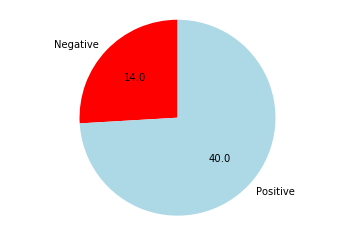

In [4]:
negative = len(fitness_first_negative)
positive = len(fitness_first_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('fitness_first_ig.png')
plt.show()

In [5]:
def wordListToFreqDict(topics):
    topics = topics['Topic'].tolist()
    print("Before: ", len(topics))
    topics = list(filter(None, topics))
    print("After: ", len(topics))
    topics = ','.join(topics)
    wordlist = topics.split(',')
    wordlist = [w for w in wordlist if w != 'thanks']
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

In [36]:
def wordListToFreqDict_emoji(topics):
    topics = topics['Topic'].tolist()
    print("Before: ", len(topics))
    topics = list(filter(None, topics))
    print("After: ", len(topics))
    topics = ','.join(topics)
    wordlist = topics.split(',')
    wordlist = [w for w in wordlist if w != 'thanks']
    wordfreq = [wordlist.count(p) for p in wordlist]
    my_dict = dict(zip(wordlist, wordfreq))
    for key,value in list(my_dict.items()):
        if value == 5:
            if key != "muayfit" or key != "birthday":
                del my_dict[key]
        else:
            if key == '🏋️‍♂️' or key == '🏋️\u200d♂️always' or key == '❤':
                del my_dict[key]

    return my_dict

Before:  40
After:  27


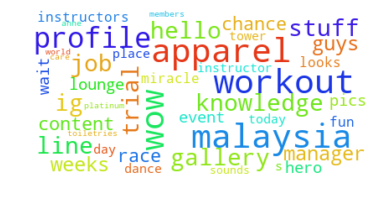

In [80]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
words = wordListToFreqDict(fitness_first_positive)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  14
After:  11


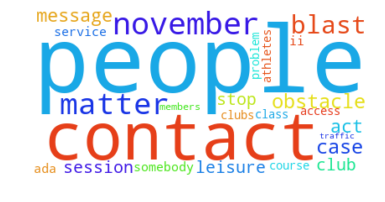

In [9]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
words = wordListToFreqDict(fitness_first_negative)
wc.generate_from_frequencies(list(words.items()))


# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
chi_fitness = final_df[final_df['Source'] == 'Instagram Comment Chi Fitness']
chi_fitness_positive = chi_fitness[chi_fitness['Sentiment'] > 0]
chi_fitness_negative = chi_fitness[chi_fitness['Sentiment'] < 0]

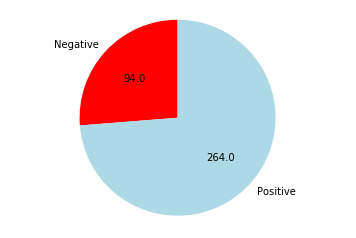

In [9]:
negative = len(chi_fitness_negative)
positive = len(chi_fitness_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('chifitness_ig.png')
plt.show()

In [10]:
chi_fitness_positive

,Comment,Post,Sentiment,Source,Topic
79,very nice gallery!,Not tomorrow. Right now. #transformation #weig...,0.875,Instagram Comment Chi Fitness,gallery
80,so healthy,It's Wednesday. Go work out. #eatclean #trainmean,0.750,Instagram Comment Chi Fitness,
81,impressive!,#BeBetterThanBetter #fitfam #fitspo #malaysia ...,0.125,Instagram Comment Chi Fitness,
82,really ?,Happy faces for an early weekend! 😄\nWho's goi...,0.625,Instagram Comment Chi Fitness,
83,i don't have workout partner but do you have o...,Happy faces for an early weekend! 😄\nWho's goi...,0.500,Instagram Comment Chi Fitness,"workout,partner"
84,we love it!,Happy faces for an early weekend! 😄\nWho's goi...,0.500,Instagram Comment Chi Fitness,
85,nice picture,Happy faces for an early weekend! 😄\nWho's goi...,0.875,Instagram Comment Chi Fitness,picture
86,"hi , are you iphone user?if ade issue, just l...",Flipping out after this 5 day weekend with @mu...,0.250,Instagram Comment Chi Fitness,"issue,k"
87,nice one @muhd3mustaqim!!,Flipping out after this 5 day weekend with @mu...,0.875,Instagram Comment Chi Fitness,
88,jom usha ig kami 😊😄😚,Breaking it down with the legend @soudyfitness...,0.125,Instagram Comment Chi Fitness,"ig,kami"


In [11]:
chi_fitness_negative

,Comment,Post,Sentiment,Source,Topic
100,fake promotion.,Yooooooo! We're dropping deals early..Don't fo...,-0.750,Instagram Comment Chi Fitness,promotion
102,@fabianng90 🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️ fabian we can no n...,Congratulations to @aliciaaaleow and @alvinooi...,-0.250,Instagram Comment Chi Fitness,"fabian,workout"
106,"sorry dont know, dont do cardio m8",Pop quiz! What does RPM stand for? \nA) Rate P...,-0.625,Instagram Comment Chi Fitness,
113,i sweat when i start getting into my deadlift ...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-1.375,Instagram Comment Chi Fitness,"sweat,start,stance,form,sucks,people,time,chri..."
116,no more excuses!,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.500,Instagram Comment Chi Fitness,excuses
117,i sweat when i think of all the work i haven't...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.375,Instagram Comment Chi Fitness,"sweat,think,work,procrastination,habit"
118,i sweat when i do insanity!!!,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.125,Instagram Comment Chi Fitness,"sweat,insanity"
119,i sweat when i do insanity!!,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.125,Instagram Comment Chi Fitness,"sweat,insanity"
120,[sing them by the tune of baa baa black sheep]...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.375,Instagram Comment Chi Fitness,"tune,baa,baa,sheep"
126,i stop making myself feeling upset because i k...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-1.500,Instagram Comment Chi Fitness,"don,t"


Before:  264
After:  241


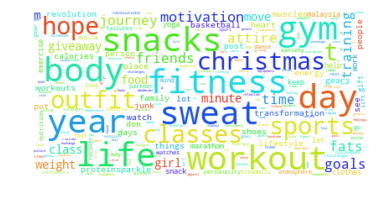

In [63]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
words = wordListToFreqDict(chi_fitness_positive)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [78]:
test = chi_fitness[chi_fitness['Sentiment'] < 0]
test[test['Topic'].str.contains('puns')]

,Comment,Post,Sentiment,Source,Topic
260,💪🏻 #nuffwith puns,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.25,Instagram Comment Chi Fitness,puns
351,i sweat when i'm in my clubhouse's sauna llin...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.50,Instagram Comment Chi Fitness,"sweat,clubhouse,uncles,workout,session,puns,ch..."
401,i sweat when i'm in my clubhouse's sauna llin...,"…and IT BEGINS NOW! \nNaughty or nice, just fo...",-0.50,Instagram Comment Chi Fitness,"sweat,clubhouse,uncles,workout,session,puns,ch..."


Before:  94
After:  91


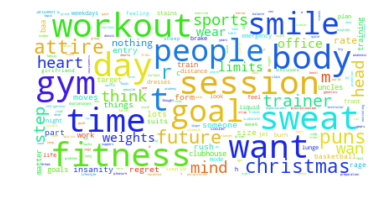

In [13]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
words = wordListToFreqDict(chi_fitness_negative)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
muayfit = final_df[final_df['Source'] == 'Instagram Comment MuayFit']
muayfit_positive = muayfit[muayfit['Sentiment'] > 0]
muayfit_negative = muayfit[muayfit['Sentiment'] < 0]

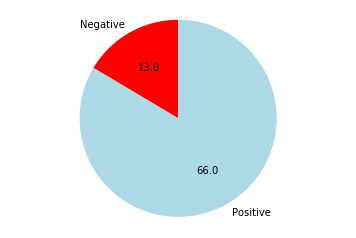

In [35]:
negative = len(muayfit_negative)
positive = len(muayfit_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('muayfit_ig.png')
plt.show()

Before:  66
After:  58


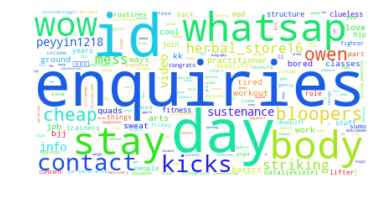

In [37]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
words = wordListToFreqDict_emoji(muayfit_positive)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  13
After:  13


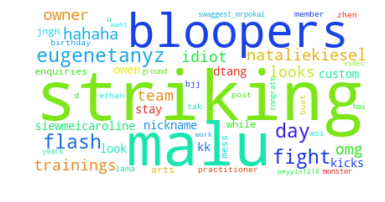

In [40]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
words = wordListToFreqDict_emoji(muayfit_negative)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
def wordListToFreqDict_single(topics):
    topics = topics['Topic'].tolist()
    print("Before: ", len(topics))
    topics = list(filter(None, topics))
    print("After: ", len(topics))
    topics = ','.join(topics)
    wordlist = topics.split(',')
    wordlist = [w for w in wordlist if w != 'thanks']
    wordfreq = [wordlist.count(p) for p in wordlist]
    my_dict = dict(zip(wordlist, wordfreq))
    for key,value in list(my_dict.items()):
        if key == 'r' or key == 't':
            del my_dict[key]
    return my_dict

In [81]:
fitnessfirst_chifitness = pd.concat([fitness_first, chi_fitness], ignore_index=True)
fitnessfirst_chifitness_postive = fitnessfirst_chifitness[fitnessfirst_chifitness['Sentiment'] > 0]
fitnessfirst_chifitness_negative = fitnessfirst_chifitness[fitnessfirst_chifitness['Sentiment'] < 0]

Before:  304
After:  268


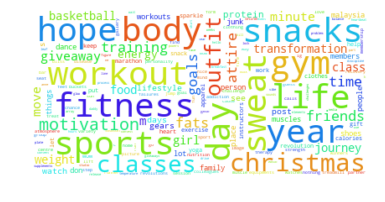

In [90]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
words = wordListToFreqDict_single(fitnessfirst_chifitness_postive)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  108
After:  102


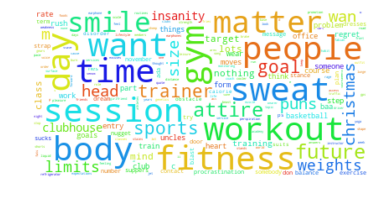

In [88]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
words = wordListToFreqDict_single(fitnessfirst_chifitness_negative)
wc.generate_from_frequencies(list(words.items()))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()